In [1]:
%load_ext autoreload
%autoreload 2
import sys
from pathlib import Path
path = str(Path.cwd().parent)
print(path)
sys.path.insert(1, path)

import numpy as np
import pandas as pd
import skforecast

print(skforecast.__version__)

/home/joaquin/Documents/GitHub/skforecast
0.18.0


In [2]:
from skforecast.experimental import Arar
from skforecast.experimental import ForecasterStats
from skforecast.datasets import load_demo_dataset
from skforecast.sarimax import Sarimax
from skforecast.model_selection import backtesting_sarimax, TimeSeriesFold

In [3]:
modelo = Sarimax(order=(2,1,2))
isinstance(modelo, (skforecast.sarimax.Sarimax, skforecast.experimental.Arar))

True

In [4]:
y = load_demo_dataset()
y

datetime
1991-07-01    0.429795
1991-08-01    0.400906
1991-09-01    0.432159
1991-10-01    0.492543
1991-11-01    0.502369
                ...   
2008-02-01    0.761822
2008-03-01    0.649435
2008-04-01    0.827887
2008-05-01    0.816255
2008-06-01    0.762137
Freq: MS, Name: y, Length: 204, dtype: float64

In [5]:
regressor = Arar()
regressor.fit(y)

,max_ar_depth,26
,max_lag,40
,safe,True


In [6]:
regressor.predict(steps=10)

array([1.06143577, 1.10532285, 1.12872236, 1.18860106, 1.19689617,
       1.22331801, 1.28466766, 0.76413015, 0.69874381, 0.81066685])

In [7]:
regressor.predict_interval(steps=10, level=[80, 95])

,mean,lower_80,upper_80,lower_95,upper_95
step,,,,,
1,1.061436,0.987936,1.134935,0.949028,1.173844
2,1.105323,1.031620,1.179025,0.992605,1.218041
3,1.128722,1.051186,1.206259,1.010141,1.247304
4,1.188601,1.107111,1.270091,1.063973,1.313229
5,1.196896,1.114637,1.279155,1.071092,1.322700
6,1.223318,1.139525,1.307111,1.095167,1.351469
7,1.284668,1.199999,1.369336,1.155178,1.414157
8,0.764130,0.678949,0.849311,0.633857,0.894403
9,0.698744,0.613059,0.784429,0.567700,0.829788


In [8]:
alpha = 0.05
100 * (1 - alpha)

95.0

In [9]:
regressor.get_params()

{'max_ar_depth': 26, 'max_lag': 40, 'safe': True}

In [10]:
forecaster = ForecasterStats(
    regressor=Arar(),
)
print(forecaster)

ForecasterStats 
Regressor: Arar() 
Series name: None 
Exogenous included: False 
Exogenous names: None 
Transformer for y: None 
Transformer for exog: None 
Training range: None 
Training index type: None 
Training index frequency: None 
Regressor parameters: {'max_ar_depth': 26, 'max_lag': 40, 'safe': True} 
fit_kwargs: {} 
Creation date: 2025-09-17 11:56:30 
Last fit date: None 
Index seen by the forecaster: None 
Skforecast version: 0.18.0 
Python version: 3.12.9 
Forecaster id: None 



In [11]:
forecaster.fit(y=y)
print(forecaster)

ForecasterStats 
Regressor: Arar() 
Series name: y 
Exogenous included: False 
Exogenous names: None 
Transformer for y: None 
Transformer for exog: None 
Training range: [Timestamp('1991-07-01 00:00:00'), Timestamp('2008-06-01 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: MS 
Regressor parameters: {'max_ar_depth': 26, 'max_lag': 40, 'safe': True} 
fit_kwargs: {} 
Creation date: 2025-09-17 11:56:30 
Last fit date: 2025-09-17 11:56:30 
Index seen by the forecaster: DatetimeIndex(['1991-07-01', '1991-08-01', '1991-09-01', '1991-10-01',
               '1991-11-01', '1991-12-01', '1992-01-01', '1992-02-01',
               '1992-03-01', '1992-04-01',
               ...
               '2007-09-01', '2007-10-01', '2007-11-01', '2007-12-01',
               '2008-01-01', '2008-02-01', '2008-03-01', '2008-04-01',
               '2008-05-01', '2008-06-01'],
              dtype='datetime64[ns]', name='datetime', length=204, freq='MS') 
Skforecast version: 0.18.0 
Pytho

In [12]:
forecaster.predict(steps=10)

2008-07-01    1.061436
2008-08-01    1.105323
2008-09-01    1.128722
2008-10-01    1.188601
2008-11-01    1.196896
2008-12-01    1.223318
2009-01-01    1.284668
2009-02-01    0.764130
2009-03-01    0.698744
2009-04-01    0.810667
Freq: MS, Name: pred, dtype: float64

In [13]:
forecaster.predict_interval(steps=10, alpha=0.05)

,pred,lower_bound,upper_bound
2008-07-01,1.061436,0.949028,1.173844
2008-08-01,1.105323,0.992605,1.218041
2008-09-01,1.128722,1.010141,1.247304
2008-10-01,1.188601,1.063973,1.313229
2008-11-01,1.196896,1.071092,1.322700
2008-12-01,1.223318,1.095167,1.351469
2009-01-01,1.284668,1.155178,1.414157
2009-02-01,0.764130,0.633857,0.894403
2009-03-01,0.698744,0.567700,0.829788
2009-04-01,0.810667,0.679155,0.942179


In [14]:
cv = TimeSeriesFold(
    initial_train_size = 100,
    steps              = 10,
    refit              = False,
)

metric, predictions = backtesting_sarimax(
    y               = y,
    forecaster      = forecaster,
    cv              = cv,
    metric          = 'mean_absolute_error',
    verbose         = False
)

╭─────────────────────────────── IgnoredArgumentWarning ───────────────────────────────╮
│ If `forecaster` uses `Arar` as regressor, `cv.refit` must be `True`. Setting         │
│ `cv.refit = True`.                                                                   │
│                                                                                      │
│ Category : skforecast.exceptions.IgnoredArgumentWarning                              │
│ Location :                                                                           │
│ /home/joaquin/Documents/GitHub/skforecast/skforecast/model_selection/_validation.py: │
│ 1454                                                                                 │
│ Suppress : warnings.simplefilter('ignore', category=IgnoredArgumentWarning)          │
╰──────────────────────────────────────────────────────────────────────────────────────╯

  0%|          | 0/11 [00:00<?, ?it/s]

<Axes: xlabel='datetime'>

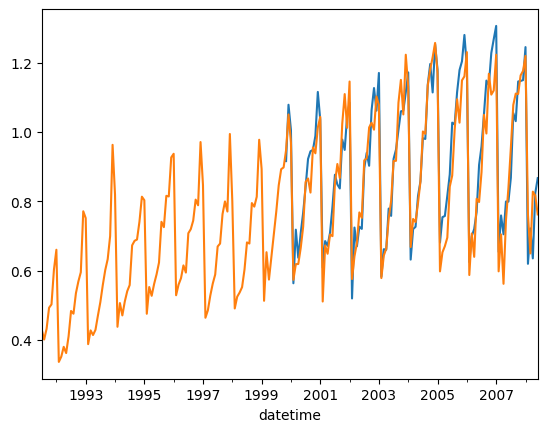

In [15]:
predictions['pred'].plot()
y.plot()